In [86]:
import xarray as xr
import numpy as np
import os
import matplotlib.pyplot as plt

In [87]:
dir = "/beegfs/CMIP6/jdpaul3/cmip6_daily_for_rasdaman"
vars = [
    "pr", 
    #"tasmin", ### these variables are missing daily data for CESM2 model, so we're not using them for this demo
    #"tasmax"  ### these variables are missing daily data for CESM2 model, so we're not using them for this demo
    ]

In [88]:
var_fp_dict = {}
for var in vars:
    hist_fp = f"cmip6_regrid_day_{var}_historical_ensemble.nc"
    proj_fp = f"cmip6_regrid_day_{var}_ssp126_ssp245_ssp370_ssp585_ensemble.nc"
    var_fp_dict[var] = {}
    var_fp_dict[var]["historical"] = os.path.join(dir, hist_fp)
    var_fp_dict[var]["projected"] = os.path.join(dir, proj_fp)

var_fp_dict

{'pr': {'historical': '/beegfs/CMIP6/jdpaul3/cmip6_daily_for_rasdaman/cmip6_regrid_day_pr_historical_ensemble.nc',
  'projected': '/beegfs/CMIP6/jdpaul3/cmip6_daily_for_rasdaman/cmip6_regrid_day_pr_ssp126_ssp245_ssp370_ssp585_ensemble.nc'}}

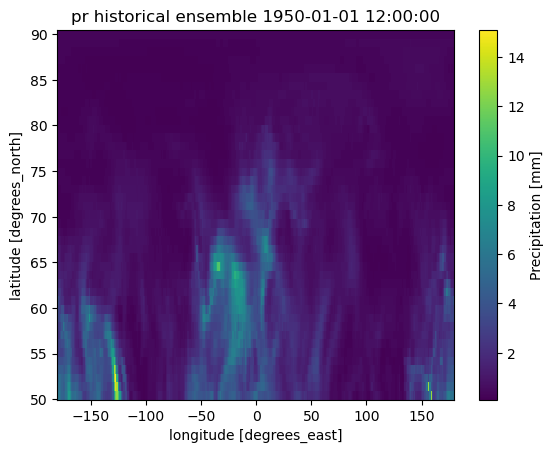

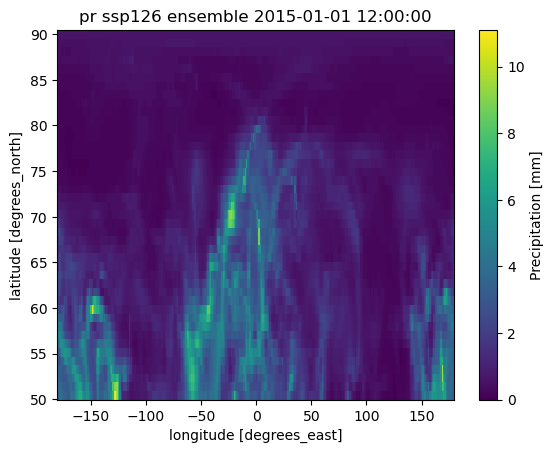

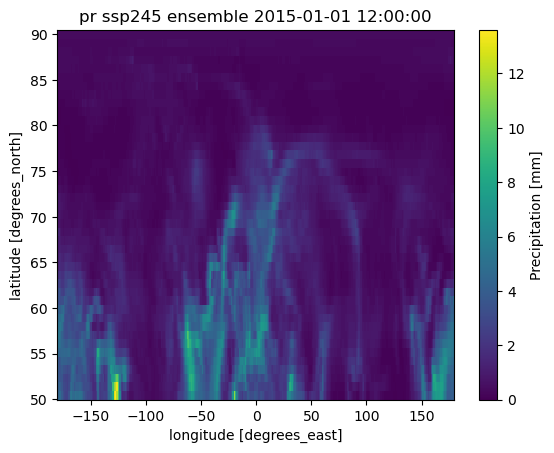

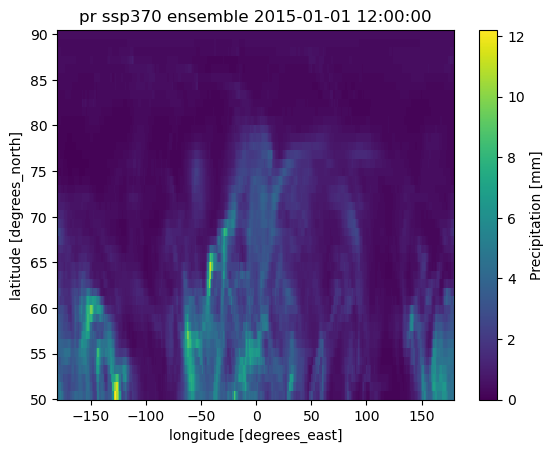

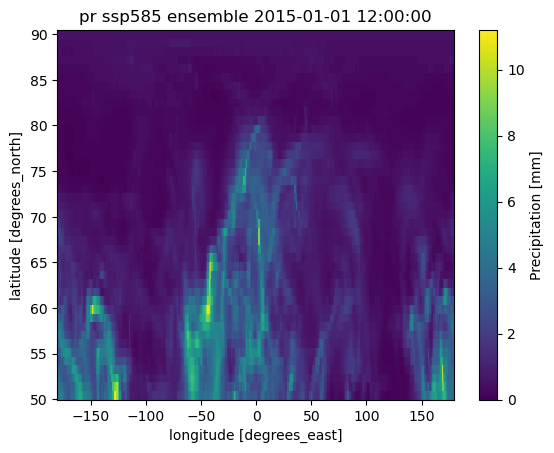

In [89]:
# for each variable, plot the first time step from each dataset for the ensemble 
for var in vars:
    hist = xr.open_dataset(var_fp_dict[var]["historical"])
    proj = xr.open_dataset(var_fp_dict[var]["projected"])

    # plot the first time step from each dataset for the ensemble 
    hist[var].isel(time=0, model=13, scenario=0).plot()
    # add a title to the plot with time
    hist_time = hist["time"].isel(time=0).values
    plt.title(f"{var} historical ensemble {hist_time}")
    plt.show()

    for i in [1,2,3,4]:

        proj[var].isel(time=0, model=13).sel(scenario=i).plot()
        # add a title to the plot with time and scenario from the encodings dict
        scenarios_dict = eval(proj.scenario.attrs["encoding"])
        scenario_name = scenarios_dict[i]

        proj_time = proj["time"].isel(time=0).values    
        plt.title(f"{var} {scenario_name} ensemble {proj_time}")
        plt.show()



In [90]:
# test that the mean of the ensemble is the same as the mean of the individual models
# just test first times step and scenario
for var in vars:
    hist = xr.open_dataset(var_fp_dict[var]["historical"])
    proj = xr.open_dataset(var_fp_dict[var]["projected"])

    # drop the Ensemble model (13) and calculate the mean of the ensemble
    hist_mean = hist[var].isel(time=0, model=slice(None, 13), scenario=0).mean(dim="model")
    proj_mean = proj[var].isel(time=0, model=slice(None, 13)).mean(dim="model")

    # get the Ensemble model (13) value
    hist_ens = hist[var].isel(time=0, model=13, scenario=0)
    proj_ens = proj[var].isel(time=0, model=13)

    print(hist_mean.values)
    print("\n")
    print(hist_ens.values)
    print("\n")
    print("--------------------------------")
    print("\n")
    print(proj_mean.values)
    print("\n")
    print(proj_ens.values)


[[0.29999998 0.29999998 0.29999998 ... 0.29999998 0.29999998 0.29999998]
 [0.33846155 0.3307692  0.3307692  ... 0.36923078 0.37692308 0.36153844]
 [0.3        0.2846154  0.29230767 ... 0.3230769  0.3153846  0.30769232]
 ...
 [5.023077   5.576924   5.146154   ... 4.1076922  4.2        4.4384613 ]
 [5.415385   5.792308   5.3230767  ... 4.7076926  4.6538463  4.8615384 ]
 [6.0461545  6.06923    5.3692303  ... 5.9230776  5.7        5.5384617 ]]


[[0.3 0.3 0.3 ... 0.3 0.3 0.3]
 [0.4 0.3 0.3 ... 0.4 0.4 0.4]
 [0.3 0.3 0.3 ... 0.3 0.3 0.3]
 ...
 [5.  5.6 5.2 ... 4.1 4.2 4.4]
 [5.4 5.8 5.3 ... 4.7 4.7 4.9]
 [6.  6.1 5.4 ... 5.9 5.7 5.5]]


--------------------------------


[[[0.54999995 0.54999995 0.54999995 ... 0.54999995 0.54999995 0.54999995]
  [0.40833333 0.40833333 0.4        ... 0.41666666 0.41666666 0.40833333]
  [0.35833332 0.35833332 0.35       ... 0.4416667  0.41666666 0.36666667]
  ...
  [3.6083336  3.3916664  3.1833334  ... 3.458333   3.6499999  3.7250001 ]
  [3.7333333  3.9749997